# Introduction

In this notebook, we set out to ascertain the generalisability of our data and analysis to the broader TCR space.
We compared sequence properties of our dataset to a background of TCR sequences sampled from [OTS](https://opig.stats.ox.ac.uk/webapps/ots/ots_paired/).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data

## Load OTS data

In [2]:
ots_sample = pd.read_csv('../data/interim/ots_sample.csv')
ots_sample

,cdr1_aa_alpha,cdr2_aa_alpha,cdr3_aa_alpha,cdr1_aa_beta,cdr2_aa_beta,cdr3_aa_beta,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta
0,TISGNEY,GLKNN,IVRVVWGGGADGLT,SGHDN,FVKESK,ASSLLGVSTDTQY,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01
1,NSMFDY,ISSIKDK,AASAQGGSYIPT,LGHDT,YNNKEL,ASSRRPTDTQY,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01
2,SSNFYA,MTLNGDE,ALGRNSGNTPLV,SGHAT,FQNNGV,ASNLAGAYEQY,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01
3,SSVPPY,YTTGATLV,AVSEPGSQGNLI,DFQATT,SNEGSKA,SALGQPLGETQY,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01
4,TSGFNG,NVLDGL,AVRDLRGSQGNLI,MGHRA,YSYEKL,ASSQAPQGADTQY,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01
...,...,...,...,...,...,...,...,...,...,...
995,SSVPPY,YTTGATLV,AVSDRAAGNKLT,MNHNS,SASEGT,ASSLEGAVAGELF,TRAV8-4*01,TRBV6-1*01,TRAJ17*01,TRBJ2-2*01
996,TTLSN,LVKSGEV,AGQEGAQKLV,SGHAT,FQNNGV,ASSWDSKNIQY,TRAV25*01,TRBV11-2*01,TRAJ54*01,TRBJ2-4*01
997,TSINN,IRSNERE,ATPTTGGTSYGKLT,SQVTM,ANQGSEA,SVIPGQGSYGYT,TRAV17*01,TRBV29-1*01,TRAJ52*01,TRBJ1-2*01
998,SSYSPS,YTSAATLV,VVSGGYSSASKII,SGHNT,YENEEA,ASSQTGTRGNIQY,TRAV8-2*03,TRBV11-3*01,TRAJ3*01,TRBJ2-4*01


In [3]:
ots_sample_genes = ots_sample[['v_call_alpha', 'v_call_beta', 'j_call_alpha', 'j_call_beta']].copy()

ots_sample_genes['alpha_subgroup'] = ots_sample_genes['v_call_alpha'].str.extract(r'^(TRAV\d+)')
ots_sample_genes['beta_subgroup'] = ots_sample_genes['v_call_beta'].str.extract(r'^(TRBV\d+)')

ots_sample_genes

,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta,alpha_subgroup,beta_subgroup
0,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01,TRAV26,TRBV14
1,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01,TRAV29,TRBV3
2,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01,TRAV24,TRBV11
3,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01,TRAV8,TRBV20
4,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01,TRAV1,TRBV4
...,...,...,...,...,...,...
995,TRAV8-4*01,TRBV6-1*01,TRAJ17*01,TRBJ2-2*01,TRAV8,TRBV6
996,TRAV25*01,TRBV11-2*01,TRAJ54*01,TRBJ2-4*01,TRAV25,TRBV11
997,TRAV17*01,TRBV29-1*01,TRAJ52*01,TRBJ1-2*01,TRAV17,TRBV29
998,TRAV8-2*03,TRBV11-3*01,TRAJ3*01,TRBJ2-4*01,TRAV8,TRBV11


In [4]:
ots_sample_cdrs = ots_sample.filter(regex=r'^cdr\d_aa_[alpha|beta]', axis=1)

ots_sample_cdrs = ots_sample_cdrs.melt(value_vars=ots_sample_cdrs.columns, var_name='cdr_type', value_name='sequence')
ots_sample_cdrs[['cdr', 'chain_type']] = ots_sample_cdrs['cdr_type'].str.extract('cdr(\d)_aa_(alpha|beta)')

ots_sample_cdrs['length'] = ots_sample_cdrs['sequence'].str.len()

ots_sample_cdrs

,cdr_type,sequence,cdr,chain_type,length
0,cdr1_aa_alpha,TISGNEY,1,alpha,7
1,cdr1_aa_alpha,NSMFDY,1,alpha,6
2,cdr1_aa_alpha,SSNFYA,1,alpha,6
3,cdr1_aa_alpha,SSVPPY,1,alpha,6
4,cdr1_aa_alpha,TSGFNG,1,alpha,6
...,...,...,...,...,...
5995,cdr3_aa_beta,ASSLEGAVAGELF,3,beta,13
5996,cdr3_aa_beta,ASSWDSKNIQY,3,beta,11
5997,cdr3_aa_beta,SVIPGQGSYGYT,3,beta,12
5998,cdr3_aa_beta,ASSQTGTRGNIQY,3,beta,13


## Load *apo*-*holo* data

In [5]:
apo_holo_summary = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
apo_holo_summary

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01
...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02


In [6]:
stcrdab_summary = pd.read_csv('../data/raw/stcrdab/db_summary.dat', delimiter='\t')
stcrdab_summary

,pdb,Bchain,Achain,Dchain,Gchain,TCRtype,model,antigen_chain,antigen_type,antigen_name,...,authors,resolution,method,r_free,r_factor,affinity,affinity_method,affinity_temperature,affinity_pmid,engineered
0,7zt2,E,D,NaN,NaN,abTCR,0,A | A,protein | Hapten,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Srikannathasan, V., Robinson, R.A.",2.4,X-RAY DIFFRACTION,0.276,0.215,NaN,NaN,NaN,NaN,True
1,7zt3,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Srikannathasan, V., Robinson, R.A.",2.4,X-RAY DIFFRACTION,0.236,0.191,NaN,NaN,NaN,NaN,True
2,7zt4,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",2.02,X-RAY DIFFRACTION,0.268,0.234,NaN,NaN,NaN,NaN,True
3,7zt5,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",2.09,X-RAY DIFFRACTION,0.266,0.225,NaN,NaN,NaN,NaN,True
4,7zt7,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",1.84,X-RAY DIFFRACTION,0.255,0.207,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3rtq,D,C,NaN,NaN,abTCR,0,A,Hapten,"N-[(2S,3S,4R)-3,4-DIHYDROXY-1-{[(1S,2S,3R,4R,5...",...,"Yu, E.D., Zajonc, D.M.",2.8,X-RAY DIFFRACTION,0.268,0.227,NaN,NaN,NaN,NaN,True
932,3dxa,O,N,NaN,NaN,abTCR,0,M,peptide,ebv decapeptide epitope,...,"Archbold, J.K., Macdonald, W.A., Gras, S., Ros...",3.5,X-RAY DIFFRACTION,0.330,0.286,NaN,NaN,NaN,NaN,True
933,1d9k,B,A,NaN,NaN,abTCR,0,P,peptide,conalbumin peptide,...,"Reinherz, E.L., Tan, K., Tang, L., Kern, P., L...",3.2,X-RAY DIFFRACTION,0.293,0.247,NaN,NaN,NaN,NaN,True
934,4gg6,H,G,NaN,NaN,abTCR,0,J,peptide,peptide from alpha/beta-gliadin mm1,...,"Broughton, S.E., Theodossis, A., Petersen, J.,...",3.2,X-RAY DIFFRACTION,0.285,0.246,NaN,NaN,NaN,NaN,True


In [7]:
apo_holo_genes = apo_holo_summary.copy().merge(
    stcrdab_summary,
    how='left',
    left_on=['pdb_id', 'alpha_chain', 'beta_chain'],
    right_on=['pdb', 'Achain', 'Bchain'],
).drop_duplicates(['cdr_sequences_collated'])[['alpha_subgroup', 'beta_subgroup']]

In [8]:
apo_holo_cdr_sequences = apo_holo_summary['cdr_sequences_collated'].str.split('-').apply(pd.Series)
apo_holo_cdr_sequences.columns = ['cdr1_alpha', 'cdr2_alpha', 'cdr3_alpha', 'cdr1_beta', 'cdr2_beta', 'cdr3_beta']

apo_holo_cdr_sequences = apo_holo_cdr_sequences.drop_duplicates()
apo_holo_cdr_sequences = apo_holo_cdr_sequences.dropna()

apo_holo_cdr_sequences
apo_holo_cdr_sequences = apo_holo_cdr_sequences.melt(value_vars=apo_holo_cdr_sequences.columns,
                                                     var_name='cdr_type',
                                                     value_name='sequence')
apo_holo_cdr_sequences[['cdr', 'chain_type']] = apo_holo_cdr_sequences['cdr_type'].str.extract('cdr(\d)_(alpha|beta)')

apo_holo_cdr_sequences['length'] = apo_holo_cdr_sequences['sequence'].str.len()

apo_holo_cdr_sequences

,cdr_type,sequence,cdr,chain_type,length
0,cdr1_alpha,DRGSQS,1,alpha,6
1,cdr1_alpha,NSMFDY,1,alpha,6
2,cdr1_alpha,TQDSSYF,1,alpha,7
3,cdr1_alpha,YSATPY,1,alpha,6
4,cdr1_alpha,TISGTDY,1,alpha,7
...,...,...,...,...,...
385,cdr3_beta,ASKVGPGQHNSPLH,3,beta,14
386,cdr3_beta,ASSYGTGINYGYT,3,beta,13
387,cdr3_beta,ASTWGRASTDTQY,3,beta,13
388,cdr3_beta,ASSDRDRVPETQY,3,beta,13


## Combine Data

### CDR Lengths

In [9]:
ots_sample_cdrs['source'] = 'OTS'
apo_holo_cdr_sequences['source'] = 'STCRDab'

cdr_lengths = pd.concat([ots_sample_cdrs, apo_holo_cdr_sequences])
cdr_lengths

,cdr_type,sequence,cdr,chain_type,length,source
0,cdr1_aa_alpha,TISGNEY,1,alpha,7,OTS
1,cdr1_aa_alpha,NSMFDY,1,alpha,6,OTS
2,cdr1_aa_alpha,SSNFYA,1,alpha,6,OTS
3,cdr1_aa_alpha,SSVPPY,1,alpha,6,OTS
4,cdr1_aa_alpha,TSGFNG,1,alpha,6,OTS
...,...,...,...,...,...,...
385,cdr3_beta,ASKVGPGQHNSPLH,3,beta,14,STCRDab
386,cdr3_beta,ASSYGTGINYGYT,3,beta,13,STCRDab
387,cdr3_beta,ASTWGRASTDTQY,3,beta,13,STCRDab
388,cdr3_beta,ASSDRDRVPETQY,3,beta,13,STCRDab


### TCR V Gene Usage

In [10]:
ots_sample_genes['source'] = 'OTS'
apo_holo_genes['source'] = 'STCRDab'

gene_usage = pd.concat([ots_sample_genes, apo_holo_genes])
gene_usage = gene_usage.dropna(subset=['alpha_subgroup', 'beta_subgroup'])

gene_usage['alpha_subgroup_num'] = gene_usage['alpha_subgroup'].str.extract(r'TRAV(\d+)', expand=False).apply(int)
gene_usage['beta_subgroup_num'] = gene_usage['beta_subgroup'].str.extract(r'TRBV(\d+)', expand=False).apply(int)

gene_usage

,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta,alpha_subgroup,beta_subgroup,source,alpha_subgroup_num,beta_subgroup_num
0,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01,TRAV26,TRBV14,OTS,26,14
1,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01,TRAV29,TRBV3,OTS,29,3
2,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01,TRAV24,TRBV11,OTS,24,11
3,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01,TRAV8,TRBV20,OTS,8,20
4,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01,TRAV1,TRBV4,OTS,1,4
...,...,...,...,...,...,...,...,...,...
335,NaN,NaN,NaN,NaN,TRAV5,TRBV7,STCRDab,5,7
343,NaN,NaN,NaN,NaN,TRAV19,TRBV6,STCRDab,19,6
347,NaN,NaN,NaN,NaN,TRAV21,TRBV6,STCRDab,21,6
355,NaN,NaN,NaN,NaN,TRAV8,TRBV7,STCRDab,8,7


# Visualize Results

## CDR Lengths

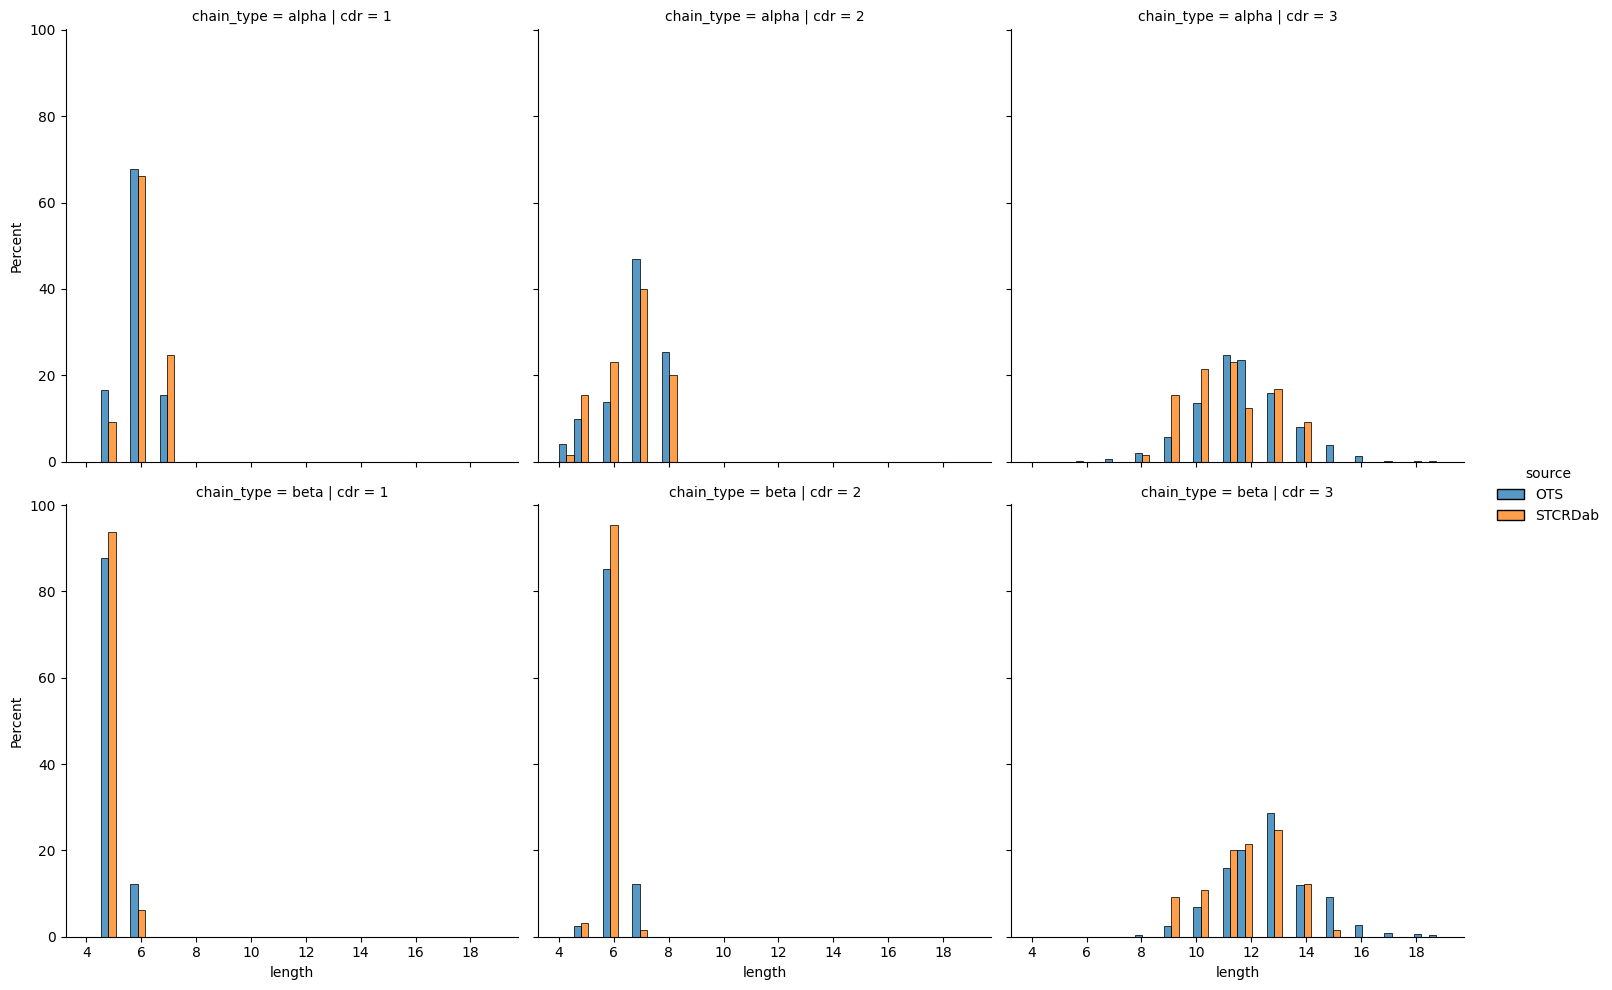

In [11]:
sns.displot(cdr_lengths,
            x='length',
            hue='source',
            row='chain_type', col='cdr',
            stat='percent', common_norm=False,
            multiple='dodge')

plt.savefig('../report/figures/stcrdab_ots_cdr_lengths.svg')
plt.show()

In [12]:
cdr_lengths.groupby(['chain_type', 'cdr', 'source'])['length'].agg([pd.Series.mode, 'mean', 'std'])

mode       mean       std
chain_type cdr source                            
alpha      1   OTS         6   5.989000  0.566745
               STCRDab     6   6.153846  0.565430
           2   OTS         7   6.796000  1.052374
               STCRDab     7   6.615385  1.026102
           3   OTS        11  11.702000  1.712930
               STCRDab    11  11.169231  1.616026
beta       1   OTS         5   5.123000  0.328602
               STCRDab     5   5.061538  0.242186
           2   OTS         6   6.097000  0.373806
               STCRDab     6   5.984615  0.215950
           3   OTS        13  12.625000  1.713859
               STCRDab    13  11.846154  1.533285

Overall, it seems that the distribution of lengths is similar between the *apo*-*holo* structures taken from the STCRDab and the background TCRs from OTS.
The distributions look similar between the data sources, with a slightly larger variety for the OTS TCRs.
Also, the mode length for each CDR type is the same between the OTS background and the dataset used in this analysis (6 for CDR1α, 7 for CDR2α, 11  for CDR3α, 5 for CDR1β, 6 for CDR2β, and 13 for CDR3β).

## TCR Gene Usage

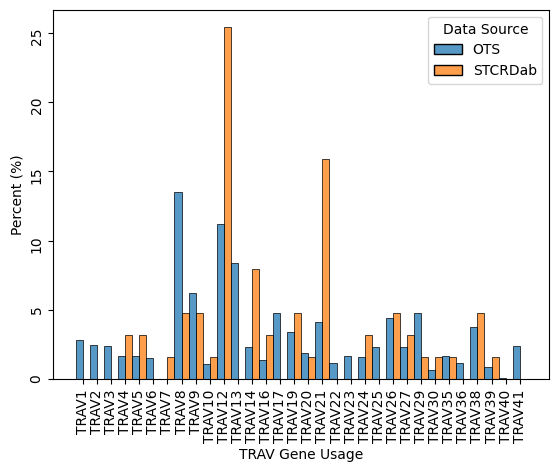

In [13]:
ax = sns.histplot(gene_usage.sort_values('alpha_subgroup_num'),
                  x='alpha_subgroup',
                  hue='source',
                  stat='percent', common_norm=False,
                  multiple='dodge')

ax.set_xlabel('TRAV Gene Usage')
ax.set_ylabel('Percent (%)')
ax.legend_.set_title('Data Source')
ax.tick_params(labelrotation=90)

plt.savefig('../report/figures/stcrdab_ots_trav_gene_usage.svg')
plt.show()

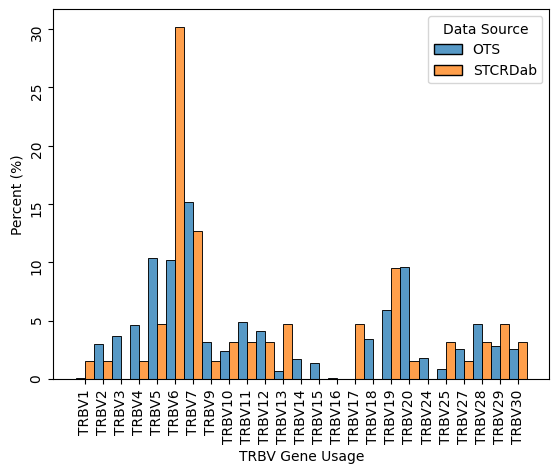

In [14]:
ax = sns.histplot(gene_usage.sort_values('beta_subgroup_num'),
                  x='beta_subgroup',
                  hue='source',
                  stat='percent', common_norm=False,
                  multiple='dodge')

ax.set_xlabel('TRBV Gene Usage')
ax.set_ylabel('Percent (%)')
ax.legend_.set_title('Data Source')
ax.tick_params(labelrotation=90)

plt.savefig('../report/figures/stcrdab_ots_trbv_gene_usage.svg')
plt.show()

The gene usage between *apo*-*holo* TCRs from STCRDab and the background TCRs from OTS is largely similar.
There are a few exceptions in the STCRDab structures that show an over-representation of certain gene usages.
For exampe, TRAV12, TRAV14, TRAV21, and TRBV6 all seem to be in higher abundance in the STCRDab data compared with the OTS background.

# Conclusion

Our analysis here shows that the conclusions drawn about TCRs from our structural analysis in this project should generalise well to other TCR:pMHC-I interactions where structure information is not currently available.
The comparisons here show that the distribution of CDR lengths and generally the distribution of V gene usage is comparable between the selected STCRDab structures and the background of TCRs sampled from OTS.
However, it does seem that there is some over representation bias of certain V genes which may affect results.
We did not look at amino acid composition and other possible comparable properties from these sequences that could be done.